In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the light curve data
file_path = "../data/ltcrv4bands_rej_dt100.data"  # Adjust if in subdirectory
raw_data = np.loadtxt(file_path)         # Shape: (880, 4)

# Sampling info
dt = 100  # seconds
time = np.arange(raw_data.shape[0]) * dt

# Energy band labels
band_labels = [
    "0.3-0.7 keV",    # Red
    "0.7-1.0 keV",    # Orange
    "1.0-4.0 keV",    # Green
    "4.0-10.0 keV"    # Blue
]

FileNotFoundError: ../data/ltcrv4bands_rej_dt100.data not found.

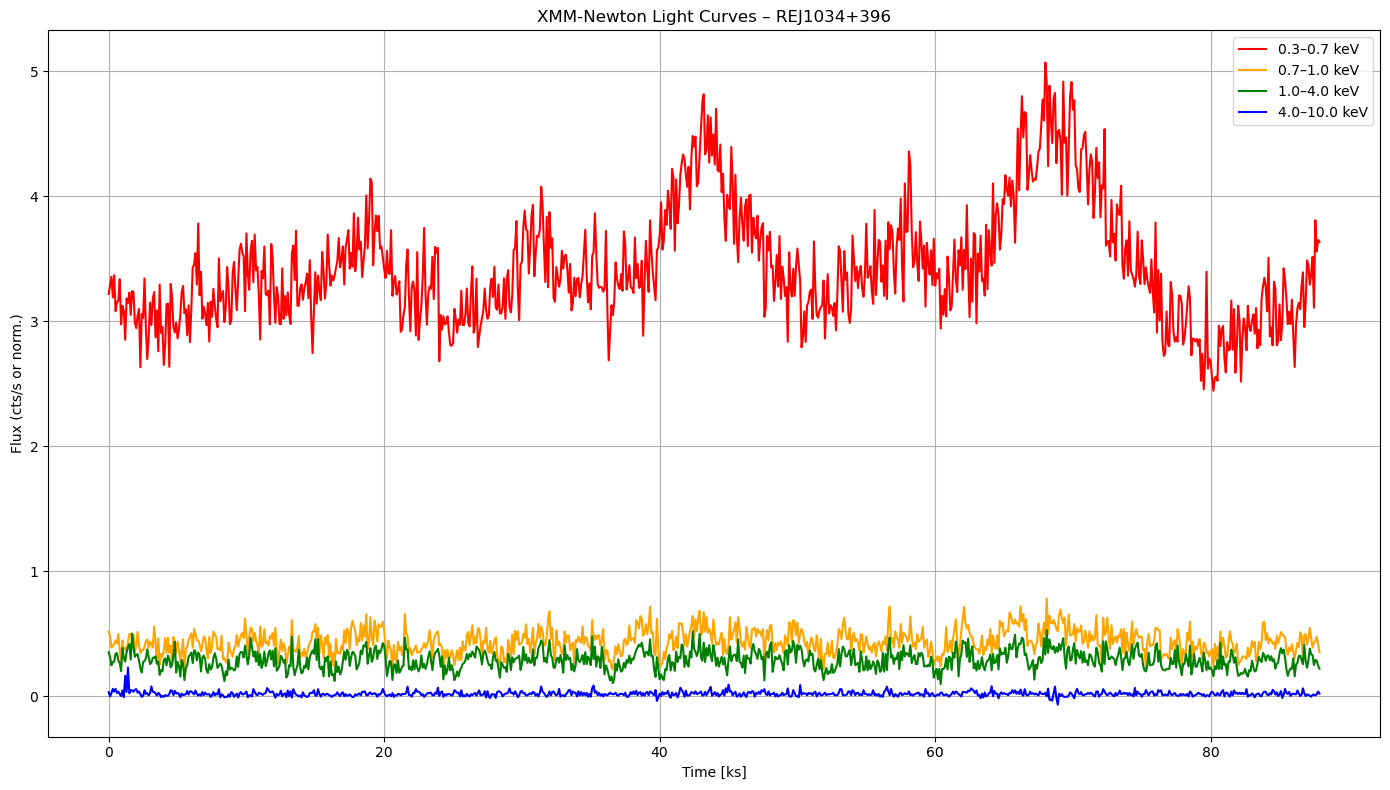

In [ ]:
# Plot all bands
plt.figure(figsize=(14, 8))

colors = ["red", "orange", "green", "blue"]

for i in range(4):
    plt.plot(time / 1000, raw_data[:, i], label=f"{band_labels[i]}", color=colors[i])

plt.xlabel("Time [ks]")
plt.ylabel("Flux (cts/s or norm.)")
plt.title("XMM-Newton Light Curves – REJ1034+396")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


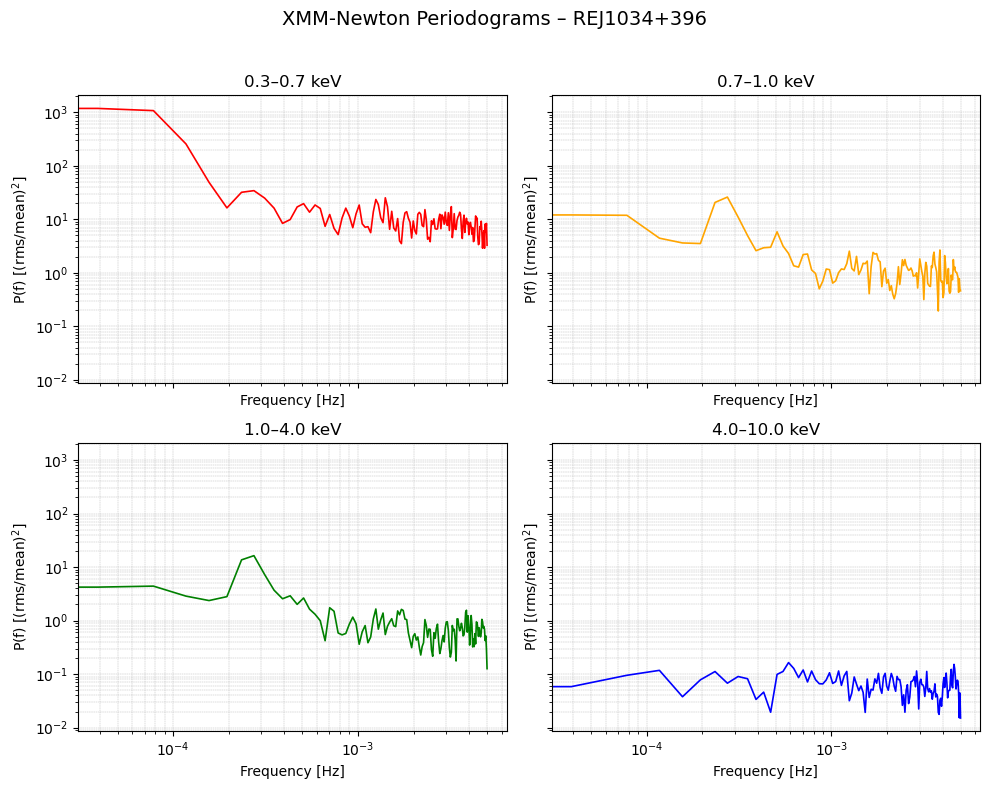

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Load the raw light curve file
file_path = "ltcrv4bands_rej_dt100.dat"
raw_data = np.loadtxt(file_path)
dt = 100  # time resolution in seconds
fs = 1.0 / dt  # sampling frequency in Hz

# Band labels and colors
band_labels = ["0.3-0.7 keV", "0.7-1.0 keV", "1.0-4.0 keV", "4.0-10.0 keV"]
colors = ["red", "orange", "green", "blue"]

# Create 2×2 PSD subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    flux = raw_data[:, i]

    # Compute Power Spectral Density using Welch method
    f, Pxx = welch(flux, fs=fs, nperseg=256)

    ax.plot(f, Pxx, color=colors[i], lw=1.2)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(band_labels[i])
    ax.set_xlabel("Frequency [Hz]")
    ax.set_ylabel(r"P(f) [(rms/mean)$^2$]")
    ax.grid(True, which="both", ls="--", lw=0.3)

plt.suptitle("XMM-Newton Periodograms – REJ1034+396", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()